<a href="https://colab.research.google.com/github/iurrutia/CO2_LSTM/blob/master/LSTM_MaunaLoa_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting models for time series data

First part is from Scott's notebook.

Second part is using LSTM for time series prediction, comparing to fitting regression

# 1. Import monthly average CO2 concentration from Mauna Loa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   

In [ ]:


myfile = 'ftp://aftp.cmdl.noaa.gov/data/trace_gases/co2/flask/surface/co2_mlo_surface-flask_1_ccgg_month.txt'
myfile2019 = 'ftp://aftp.cmdl.noaa.gov/data/trace_gases/co2/in-situ/surface/mlo/co2_mlo_surface-insitu_1_ccgg_MonthlyData.txt'
      
# making data frame   
#df = pd.read_csv(myfile,sep='\t',skiprows=(0,1,2),header=(70))
#df = pd.read_csv(myfile,sep='\r',header=(69), delim_whitespace=True)
#df = pd.read_csv(myfile2019, header= (150), delim_whitespace=True)
df = pd.read_csv(myfile2019, header= (149), delim_whitespace=True)
    
df.head()  

site_code  year  month  day  ...  altitude  elevation  intake_height  qcflag
0       MLO  1973      1    1  ...    3437.0     3397.0           40.0     *..
1       MLO  1973      2    1  ...    3437.0     3397.0           40.0     *..
2       MLO  1973      3    1  ...    3437.0     3397.0           40.0     *..
3       MLO  1973      4    1  ...    3437.0     3397.0           40.0     *..
4       MLO  1973      5    1  ...    3437.0     3397.0           40.0     *..

[5 rows x 17 columns]

In [ ]:
df.tail()

site_code  year  month  day  ...  altitude  elevation  intake_height  qcflag
559       MLO  2019      8    1  ...    3437.0     3397.0           40.0     ...
560       MLO  2019      9    1  ...    3437.0     3397.0           40.0     ...
561       MLO  2019     10    1  ...    3437.0     3397.0           40.0     ...
562       MLO  2019     11    1  ...    3437.0     3397.0           40.0     ...
563       MLO  2019     12    1  ...    3437.0     3397.0           40.0     ...

[5 rows x 17 columns]

In [ ]:
df.columns

Index(['site_code', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'time_decimal', 'value', 'value_std_dev', 'nvalue', 'latitude',
       'longitude', 'altitude', 'elevation', 'intake_height', 'qcflag'],
      dtype='object')

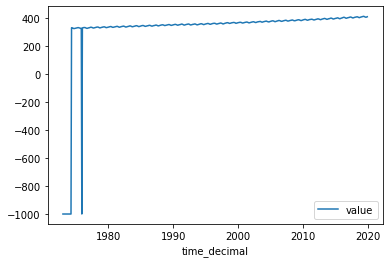

In [ ]:
df.plot(x="time_decimal", y='value')

In [ ]:
df1974 = df[df.value > 0] #remove values of -999
df1974.head(20)


site_code  year  month  day  ...  altitude  elevation  intake_height  qcflag
16       MLO  1974      5    1  ...    3437.0     3397.0           40.0     ...
17       MLO  1974      6    1  ...    3437.0     3397.0           40.0     ...
18       MLO  1974      7    1  ...    3437.0     3397.0           40.0     ...
19       MLO  1974      8    1  ...    3437.0     3397.0           40.0     ...
20       MLO  1974      9    1  ...    3437.0     3397.0           40.0     ...
21       MLO  1974     10    1  ...    3437.0     3397.0           40.0     ...
22       MLO  1974     11    1  ...    3437.0     3397.0           40.0     ...
23       MLO  1974     12    1  ...    3437.0     3397.0           40.0     ...
24       MLO  1975      1    1  ...    3437.0     3397.0           40.0     ...
25       MLO  1975      2    1  ...    3437.0     3397.0           40.0     ...
26       MLO  1975      3    1  ...    3437.0     3397.0           40.0     ...
27       MLO  1975      4    1  ...    3437.0     3397.0           40.0     ...
28       MLO  1975      5    1  ...    3437.0     3397.0           40.0     ...
29       MLO  1975      6    1  ...    3437.0     3397.0           40.0     ...
30       MLO  1975      7    1  ...    3437.0     3397.0           40.0     ...
31       MLO  1975      8    1  ...    3437.0     3397.0           40.0     ...
32       MLO  1975      9    1  ...    3437.0     3397.0           40.0     ...
33       MLO  1975     10    1  ...    3437.0     3397.0           40.0     ...
34       MLO  1975     11    1  ...    3437.0     3397.0           40.0     ...
36       MLO  1976      1    1  ...    3437.0     3397.0           40.0     ...

[20 rows x 17 columns]

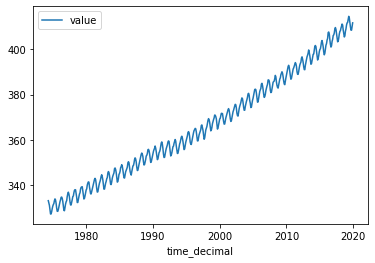

In [ ]:
df1974.plot(x="time_decimal", y='value')

In [ ]:
#df1974 is missing data from December of 1975
df1976 = df[df.year > 1975] #remove values of before 1976
df1976.head(20)

site_code  year  month  day  ...  altitude  elevation  intake_height  qcflag
36       MLO  1976      1    1  ...    3437.0     3397.0           40.0     ...
37       MLO  1976      2    1  ...    3437.0     3397.0           40.0     ...
38       MLO  1976      3    1  ...    3437.0     3397.0           40.0     ...
39       MLO  1976      4    1  ...    3437.0     3397.0           40.0     ...
40       MLO  1976      5    1  ...    3437.0     3397.0           40.0     ...
41       MLO  1976      6    1  ...    3437.0     3397.0           40.0     ...
42       MLO  1976      7    1  ...    3437.0     3397.0           40.0     ...
43       MLO  1976      8    1  ...    3437.0     3397.0           40.0     ...
44       MLO  1976      9    1  ...    3437.0     3397.0           40.0     ...
45       MLO  1976     10    1  ...    3437.0     3397.0           40.0     ...
46       MLO  1976     11    1  ...    3437.0     3397.0           40.0     ...
47       MLO  1976     12    1  ...    3437.0     3397.0           40.0     ...
48       MLO  1977      1    1  ...    3437.0     3397.0           40.0     ...
49       MLO  1977      2    1  ...    3437.0     3397.0           40.0     ...
50       MLO  1977      3    1  ...    3437.0     3397.0           40.0     ...
51       MLO  1977      4    1  ...    3437.0     3397.0           40.0     ...
52       MLO  1977      5    1  ...    3437.0     3397.0           40.0     ...
53       MLO  1977      6    1  ...    3437.0     3397.0           40.0     ...
54       MLO  1977      7    1  ...    3437.0     3397.0           40.0     ...
55       MLO  1977      8    1  ...    3437.0     3397.0           40.0     ...

[20 rows x 17 columns]

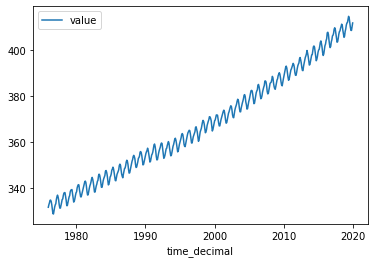

In [ ]:
df1976.plot(x="time_decimal", y='value')

In [ ]:
seriesLength = len(df1976)-12 #length minus the last year
len(df1976)

528

# 2. LSTM - keras

Following this example: 

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
df1976.columns

Index(['site_code', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'time_decimal', 'value', 'value_std_dev', 'nvalue', 'latitude',
       'longitude', 'altitude', 'elevation', 'intake_height', 'qcflag'],
      dtype='object')

In [ ]:
# Select the necessary columns
dataset = df1976[["time_decimal", "value"]]
dataset.head()

time_decimal   value
36   1976.000000  331.65
37   1976.084699  332.76
38   1976.163934  333.54
39   1976.248634  334.66
40   1976.330601  334.77

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.        , 0.0342139 ],
       [0.00192871, 0.04713139],
       [0.00373299, 0.05620854],
       ...,
       [0.9961944 , 0.92866287],
       [0.99812839, 0.9493774 ],
       [1.        , 0.96648435]])

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

353 175


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0430
Epoch 2/100
 - 1s - loss: 0.0130
Epoch 3/100
 - 1s - loss: 0.0065
Epoch 4/100
 - 1s - loss: 0.0022
Epoch 5/100
 - 0s - loss: 4.4133e-04
Epoch 6/100
 - 0s - loss: 7.7068e-05
Epoch 7/100
 - 0s - loss: 4.1812e-05
Epoch 8/100
 - 0s - loss: 3.8420e-05
Epoch 9/100
 - 0s - loss: 3.6550e-05
Epoch 10/100
 - 0s - loss: 3.3930e-05
Epoch 11/100
 - 0s - loss: 3.1560e-05
Epoch 12/100
 - 0s - loss: 2.8073e-05
Epoch 13/100
 - 0s - loss: 2.5644e-05
Epoch 14/100
 - 0s - loss: 2.3062e-05
Epoch 15/100
 - 0s - loss: 1.8783e-05
Epoch 16/100
 - 0s - loss: 1.5473e-05
Epoch 17/100
 - 0s - loss: 1.2485e-05
Epoch 18/100
 - 0s - loss: 1.0694e-05
Epoch 19/100
 - 0s - loss: 8.3192e-06
Epoch 20/100
 - 0s - loss: 7.1875e-06
Epoch 21/100
 - 0s - loss: 6.2483e-06
Epoch 22/100
 - 0s - loss: 5.5214e-06
Epoch 23/100
 - 0s - loss: 5.4558e-06
Epoch 24/100
 - 0s - loss: 5.4057e-06
Epoch 25/100
 - 0s - loss: 6.4689e-06
Epoch 26/100
 - 0s - loss: 5.1550e-06
Epoch 27/100
 - 0s - loss: 5.1645e-06

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: ignored

# 2. LSTM - pytorch

Following this example: 

https://github.com/spdin/time-series-prediction-lstm-pytorch/blob/master/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb